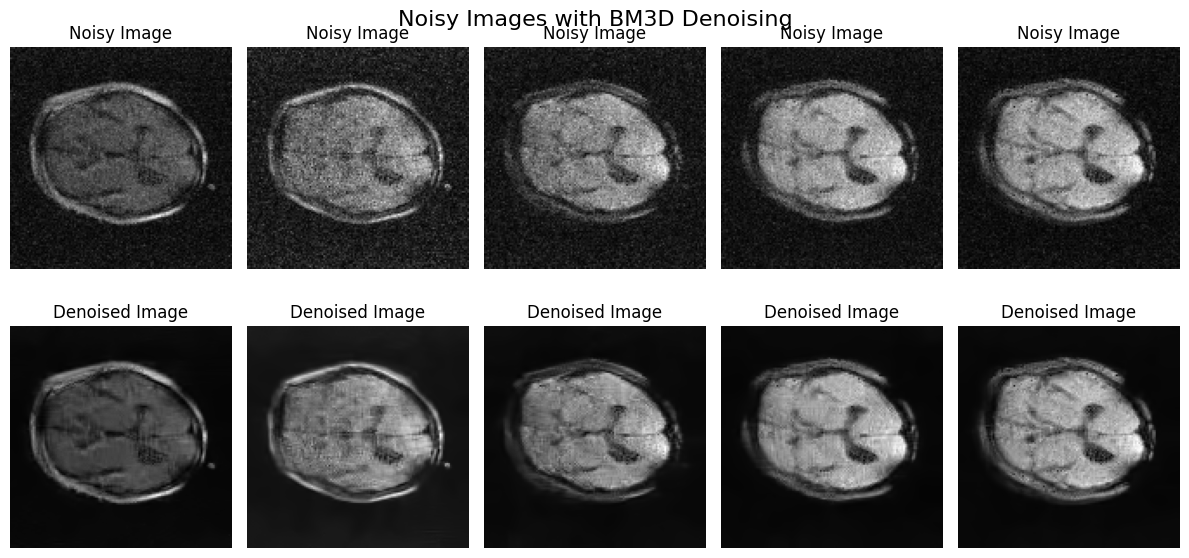

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import scipy.io
import bm3d

def create_background_mask(image_gray):
    # Threshold the image to create a binary mask
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh

    # Clear border artifacts
    cleared_image = clear_border(binary_image)

    # Label connected components and find the largest area (background)
    label_image = label(cleared_image)
    regions = regionprops(label_image)
    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label

    # Create a mask for the background
    background_mask = label_image == background_label
    return background_mask

def denoise_image(noisy_image_gray):
    # Estimate noise level
    sigma_est = np.mean(estimate_sigma(noisy_image_gray))

    # Create background mask
    background_mask = create_background_mask(noisy_image_gray)

    # Apply BM3D denoising
    denoised_image = bm3d.bm3d(noisy_image_gray, sigma_psd=sigma_est)

    return denoised_image

def main():
    # Load noisy image data from the mat file
    mat = scipy.io.loadmat('../TraditionalMethods/medicaldata.mat')
    noisy_image_data = mat['data']

    # Plot the noisy and denoised images
    conditions = noisy_image_data.shape[2]
    plt.figure(figsize=(12, 6))
    for j in range(conditions):
        noisy_image = noisy_image_data[:, :, j]

        # Convert to grayscale if it's a multichannel image
        if noisy_image.ndim == 3 and noisy_image.shape[2] == 3:
            noisy_image_gray = rgb2gray(noisy_image)
        else:
            noisy_image_gray = noisy_image

        # Denoise the image
        denoised_image = denoise_image(noisy_image_gray)

        plt.subplot(2, conditions, j + 1)
        plt.imshow(noisy_image_gray, cmap='gray')
        plt.title('Noisy Image')
        plt.axis('off')

        plt.subplot(2, conditions, j + conditions + 1)
        plt.imshow(denoised_image, cmap='gray')
        plt.title(f'Denoised Image')
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle('Noisy Images with BM3D Denoising', fontsize=16)
    plt.show()

if __name__ == "__main__":
    main()


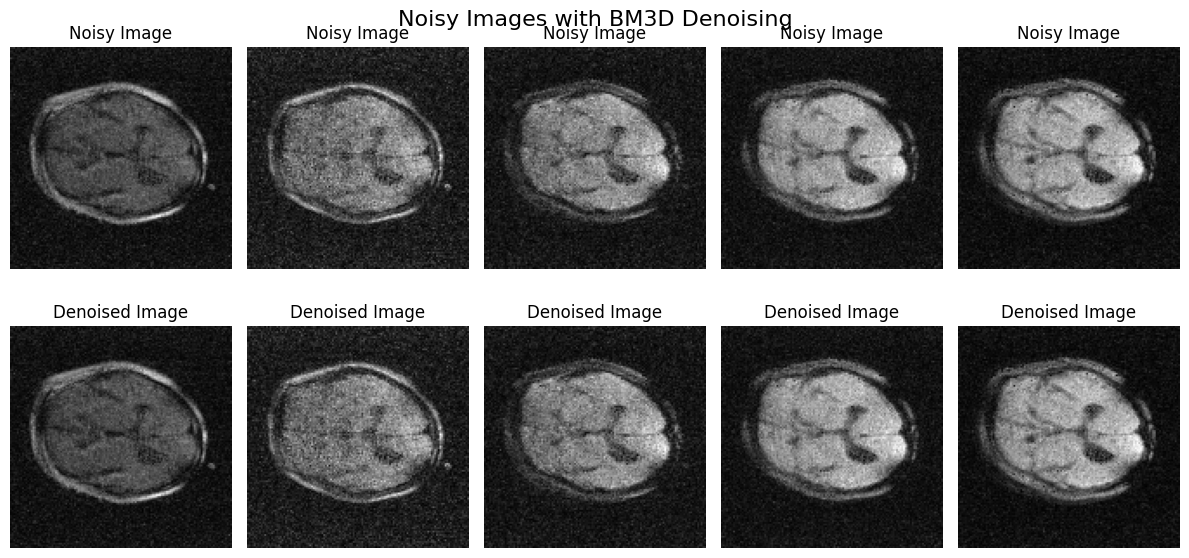

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import scipy.io
import bm3d

def create_background_mask(image_gray):
    # Threshold the image to create a binary mask
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh

    # Clear border artifacts
    cleared_image = clear_border(binary_image)

    # Label connected components and find the largest area (background)
    label_image = label(cleared_image)
    regions = regionprops(label_image)
    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label

    # Create a mask for the background
    background_mask = label_image == background_label
    return background_mask

def denoise_image(noisy_image_gray):
    # Estimate noise level
    sigma_est = np.mean(estimate_sigma(noisy_image_gray))

    # Create background mask
    background_mask = create_background_mask(noisy_image_gray)

    # Apply BM3D denoising
   
        # Apply BM3D Denoising
    denoised_image = bm3d.bm3d(noisy_image_gray, sigma_psd=15/255, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

    return denoised_image

def main():
    # Load noisy image data from the mat file
    mat = scipy.io.loadmat('../TraditionalMethods/medicaldata.mat')
    noisy_image_data = mat['data']

    # Plot the noisy and denoised images
    conditions = noisy_image_data.shape[2]
    plt.figure(figsize=(12, 6))
    for j in range(conditions):
        noisy_image = noisy_image_data[:, :, j]

        # Convert to grayscale if it's a multichannel image
        if noisy_image.ndim == 3 and noisy_image.shape[2] == 3:
            noisy_image_gray = rgb2gray(noisy_image)
        else:
            noisy_image_gray = noisy_image

        # Denoise the image
        denoised_image = denoise_image(noisy_image_gray)

        plt.subplot(2, conditions, j + 1)
        plt.imshow(noisy_image_gray, cmap='gray')
        plt.title('Noisy Image')
        plt.axis('off')

        plt.subplot(2, conditions, j + conditions + 1)
        plt.imshow(denoised_image, cmap='gray')
        plt.title(f'Denoised Image')
        plt.axis('off')


        
        # Save denoised image to file
        plt.imsave(f'denoised_image_BM3D{j + 1}.png', denoised_image, cmap='gray')


    plt.tight_layout()
    plt.suptitle('Noisy Images with BM3D Denoising', fontsize=16)
    plt.show()

if __name__ == "__main__":
    main()
